In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
activities_csv = pd.read_csv('ac_activities_torben_clean_v2.csv')
activities_csv.head()

,id,type,start_date_local,x_start_h,name,name_short,x_min,x_mi,x_min/mi,x_mph,...,athlete_count,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url
0,868156484,Run,15.01.2017 06:17:41,6.3,Morning Run,Morning,248.2,26.510,9.36,6.41,...,29,NaN,42663.3,14892,33.176906,-117.335854,(GMT-08:00) America/Los_Angeles,2017-01-15,0.51,https://www.strava.com/activities/868156484
1,868156415,Run,17.01.2017 18:50:18,18.8,Evening Run,Evening,16.1,2.023,7.95,7.55,...,30,NaN,3256.2,1300,32.720301,-117.150205,(GMT-08:00) America/Los_Angeles,2017-01-17,NaN,https://www.strava.com/activities/868156415
2,868156459,Run,19.01.2017 06:35:12,6.6,Morning Run,Morning,87.0,10.091,8.62,6.96,...,1,NaN,16240.6,5271,32.853794,-116.960111,(GMT-08:00) America/Los_Angeles,2017-01-19,0.85,https://www.strava.com/activities/868156459
3,868156435,Run,21.01.2017 07:17:12,7.3,Morning Run,Morning,88.8,11.518,7.71,7.78,...,2,NaN,18535.6,5804,32.758368,-117.242017,(GMT-08:00) America/Los_Angeles,2017-01-21,0.16,https://www.strava.com/activities/868156435
4,868156458,Run,22.01.2017 16:50:51,16.8,Afternoon Run,Afternoon,89.6,10.066,8.90,6.74,...,1,NaN,16199.8,5658,32.853570,-116.960471,(GMT-08:00) America/Los_Angeles,2017-01-22,0.48,https://www.strava.com/activities/868156458


In [3]:
activities = activities_csv[["x_start_h", "name_short", "x_min", "x_mi", "x_min/mi", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count", "distance", "elapsed_time"]].copy()
activities["pace"] = activities["x_min/mi"]
activities.head()

,x_start_h,name_short,x_min,x_mi,x_min/mi,total_elevation_gain,average_cadence,elev_low,elev_high,athlete_count,distance,elapsed_time,pace
0,6.3,Morning,248.2,26.510,9.36,217.6,80.8,-7.1,97.1,29,42663.3,14892,9.36
1,18.8,Evening,16.1,2.023,7.95,0.0,84.5,40.7,44.6,30,3256.2,1300,7.95
2,6.6,Morning,87.0,10.091,8.62,137.6,84.0,106.0,201.5,1,16240.6,5271,8.62
3,7.3,Morning,88.8,11.518,7.71,29.5,84.9,1.3,20.1,2,18535.6,5804,7.71
4,16.8,Afternoon,89.6,10.066,8.90,77.0,83.0,96.0,137.9,1,16199.8,5658,8.90


In [4]:
activities = activities.dropna(how="any")
#activities["start_date_local"] = activities["start_date_local"].apply(pd.to_datetime,errors="coerce")
activities.dtypes

x_start_h               float64
name_short               object
x_min                   float64
x_mi                    float64
x_min/mi                float64
total_elevation_gain    float64
average_cadence         float64
elev_low                float64
elev_high               float64
athlete_count             int64
distance                float64
elapsed_time              int64
pace                    float64
dtype: object

In [5]:
y = activities["name_short"]
target_names = ["Morning","Afternoon","Evening"]

In [6]:
X = activities.drop(["name_short", "x_min/mi", "distance", "elapsed_time"], axis=1)
feature_names = X.columns
X.head()

,x_start_h,x_min,x_mi,total_elevation_gain,average_cadence,elev_low,elev_high,athlete_count,pace
0,6.3,248.2,26.510,217.6,80.8,-7.1,97.1,29,9.36
1,18.8,16.1,2.023,0.0,84.5,40.7,44.6,30,7.95
2,6.6,87.0,10.091,137.6,84.0,106.0,201.5,1,8.62
3,7.3,88.8,11.518,29.5,84.9,1.3,20.1,2,7.71
4,16.8,89.6,10.066,77.0,83.0,96.0,137.9,1,8.90


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.917
k: 3, Train/Test Score: 0.966/0.936
k: 5, Train/Test Score: 0.957/0.917
k: 7, Train/Test Score: 0.942/0.908
k: 9, Train/Test Score: 0.945/0.881
k: 11, Train/Test Score: 0.929/0.862
k: 13, Train/Test Score: 0.917/0.862
k: 15, Train/Test Score: 0.908/0.862
k: 17, Train/Test Score: 0.911/0.881
k: 19, Train/Test Score: 0.899/0.853


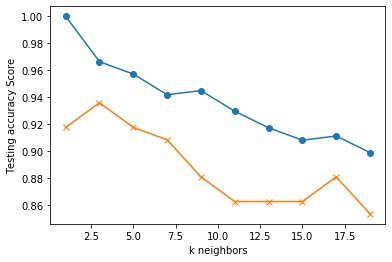

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.862


k: 1, Train/Test Score: 1.000/0.917
k: 3, Train/Test Score: 0.966/0.936
k: 5, Train/Test Score: 0.957/0.917
k: 7, Train/Test Score: 0.942/0.908
k: 9, Train/Test Score: 0.945/0.881
k: 11, Train/Test Score: 0.929/0.862
k: 13, Train/Test Score: 0.917/0.862
k: 15, Train/Test Score: 0.908/0.862
k: 17, Train/Test Score: 0.911/0.881
k: 19, Train/Test Score: 0.899/0.853
k: 21, Train/Test Score: 0.893/0.853
k: 23, Train/Test Score: 0.887/0.853
k: 25, Train/Test Score: 0.880/0.853
k: 27, Train/Test Score: 0.890/0.853
k: 29, Train/Test Score: 0.880/0.853


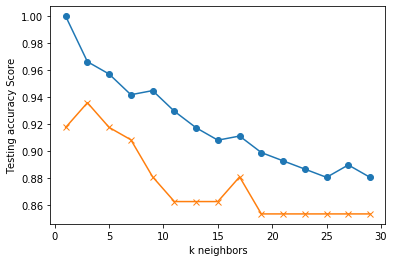

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.881
